<a href="https://www.kaggle.com/code/nayaabali/primary?scriptVersionId=124130473" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np
import time
import torch
import os
import torch.nn as nn
import torch.optim as optim
import csv
import torchvision
import torchtext
from torch.utils.data import Dataset
from torch.utils.data.sampler import SubsetRandomSampler
from torchvision import datasets, models, transforms
import torchtext.vocab as vocab
import torchvision.transforms as transforms
import torchvision.transforms.functional as F
from torchtext import data
import matplotlib.pyplot as plt
from PIL import Image
import torchtext.data
from torch.utils.data import DataLoader
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction, corpus_bleu
import torchtext
import pandas as pd
import torchtext.datasets as datasets
import math
from data_loader import get_loader


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
    
data = pd.read_csv('/kaggle/input/dataset/aug_labels.tsv', sep='\t')
#Panda adds a random column to the data so do:
data = data.drop(columns='Unnamed: 0')

print(data.shape) # >>> should be like (22803,1) or smth

#Convert the dataframe to a list

labels = data.values.tolist() #you now have a list of the labels
print("This is the first label: ", labels[0])


images = torch.load('/kaggle/input/dataset/aug_images.pt') 
print(images.shape) #should be the 22803,3,224,224

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
# Just a test to see that the images are being loaded correctly
for i in range (2):
    image = F.to_pil_image(images[i].squeeze(0))
    plt.imshow(image)
    plt.show()

In [ ]:
# Create a custom class to create a dataset from an array of tensors
class TensorDataset(Dataset):
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        x = self.data[index]
        return x

# Create arrays for each of the datasets
training = []
validation = []
testing = []

# Populate each of the arrays with the images

for i in range(0,5000):
    training.append(images[i])

for n in range(5000, 5350):
    validation.append(images[n])

for m in range(5350, 5701):
    testing.append(images[n])
    
for index in range(5701, 10702):
    training.append(images[index])

for ind in range(11402, 16403):
    training.append(images[ind])

for inde in range(17103, 22104):
    training.append(images[inde])
    
# Adding labels
training_labels = []
validation_labels = []
testing_labels = []

for i in range(0,5000):
    training_labels.append(labels[i])

for n in range(5000, 5350):
    validation_labels.append(labels[n])

for m in range(5350, 5701):
    testing_labels.append(labels[m])
    
for index in range(5701, 10702):
    training_labels.append(labels[index])

for ind in range(11402, 16403):
    training_labels.append(labels[ind])

for inde in range(17103, 22104):
    training_labels.append(labels[inde])

In [ ]:
import pandas as pd
import torch
import torchtext.vocab as vocab

# Define the tokenizer (e.g. split on whitespace)
tokenizer = lambda x: x.split()

# Load the data into a pandas dataframe
df = pd.read_csv('/kaggle/input/dataset/aug_labels.tsv', delimiter='\t', header=None, names=['caption'])

# Apply the tokenizer to the 'caption' column
df['caption'] = df['caption'].apply(tokenizer)

# Build the vocabulary
glooooove = vocab.GloVe(name='6B', dim=300)
vocab1 = vocab.vocab(glooooove.stoi)
vocab1.append_token('<pad>')
vocab1.append_token('<start>')
vocab1.append_token('<end>')
vocab1.append_token('<unk>')
vocab1.append_token('the')
word_to_idx = {word: i for i, word in enumerate(vocab1.get_itos())}

# Convert the data to a PyTorch tensor
#captions = torch.tensor([[word_to_idx.get(word, 0) for word in caption] for caption in df['caption']])

words = [word for caption in df['caption'] for word in caption]
print(words[:10])

# Print the resulting tensor and its shape

In [ ]:
vocab_len = len(vocab1)
print(vocab_len)

In [75]:
label_list = [training_labels, validation_labels, testing_labels]
#caption list has 3 sublists consisting of captions for the training, valid, testing images
captions_list = []

counter = 0
for list_type in label_list:
    # big_list_words consists of all captions in one type of image group (training, validation, testing)
    big_list_words = [] # there will be three of these
    for label in list_type:
        print("new sent")
        label = label[0]
        label = label.split()
        print (label)
        list_words = []
        for word in label:
            print(vocab1.get_stoi()[word])
            list_words.append(vocab1.get_stoi()[word])
        counter+=1        
        if counter == 25:
            print(":3")
            break
        print(list_words)
        single_caption_list = [vocab1.get_stoi()['<start>']] + list_words + [vocab1.get_stoi()['<end>']]
        print(single_caption_list)
            
        big_list_words.append(torch.Tensor(single_caption_list))
            
    #captions = torch.as_tensor(big_list_words)

    captions_list.append(big_list_words)
    counter =0
    
training_labels = captions_list[0]

validation_labels = captions_list[1]

test_labels = captions_list[2]

2
429
0
4541
12
520
2092
1
[1791, 4, 9450, 8890, 58559, 400003, 4735, 2, 429, 0, 4541, 12, 520, 2092, 1]
[400000, 1791, 4, 9450, 8890, 58559, 400003, 4735, 2, 429, 0, 4541, 12, 520, 2092, 1, 400001]
new sent
['filling', 'up', 'the', 'yellow', 'cab', 'at', 'a', 'gas', 'station']
7166
59
400003
2842
11141
21
6
850
514
[7166, 59, 400003, 2842, 11141, 21, 6, 850, 514]
[400000, 7166, 59, 400003, 2842, 11141, 21, 6, 850, 514, 400001]
new sent
['person', 'addresses', 'the', 'audiences', 'at', 'the', 'event', '.']
898
7801
400003
5809
21
400003
769
1
[898, 7801, 400003, 5809, 21, 400003, 769, 1]
[400000, 898, 7801, 400003, 5809, 21, 400003, 769, 1, 400001]
new sent
['athlete', 'kicks', 'the', 'ball', 'for', 'a', 'goal', 'during', 'match', '.']
5834
9388
400003
1082
9
6
714
104
549
1
[5834, 9388, 400003, 1082, 9, 6, 714, 104, 549, 1]
[400000, 5834, 9388, 400003, 1082, 9, 6, 714, 104, 549, 1, 400001]
new sent
['actor', 'attends', 'a', 'special', 'screening']
2017
16032
6
556
6659
[2017, 16032, 6

In [92]:
print(len(captions_list))

3


In [97]:
# Adding padding to all the tensor version of the captions
from torch.nn.utils.rnn import pad_sequence
training_labels = pad_sequence(training_labels, padding_value = vocab1.get_stoi()['<pad>'])
validation_labels = pad_sequence(validation_labels, padding_value = vocab1.get_stoi()['<pad>'])
test_labels = pad_sequence(test_labels, padding_value = vocab1.get_stoi()['<pad>'])

print(len(training_labels[0]))

print(len(training_labels[20]))

19
19


In [98]:
# Sample testing for training
training_temp = []
valid_temp = []
testing_temp = []

print("running")

for i in range(0,26):
    training_temp.append(images[i])
for n in range(5000, 5026):
    valid_temp.append(images[n])
for m in range(5350, 5376):
    testing_temp.append(images[m])

print("finished")

running
finished


In [99]:
# delete later
training_data = TensorDataset(training_temp, training_labels)
validation_data = TensorDataset(valid_temp, validation_labels)
testing_data = TensorDataset(testing_temp, testing_labels)
print("running")

# Create a DataLoader from the dataset
train_dataloader = DataLoader(training_data, batch_size=32, shuffle=True)
valid_dataloader = DataLoader(validation_data, batch_size=32, shuffle=True)
test_dataloader = DataLoader(testing_data, batch_size=32, shuffle=True)
print("finished")

running
finished


In [100]:
# Create the dataloaders using the custom class
# Create a dataset from the array of tensors
training_data = TensorDataset(training, training_labels)
validation_data = TensorDataset(validation, validation_labels)
testing_data = TensorDataset(testing, testing_labels)

# Create a DataLoader from the dataset
train_dataloader = DataLoader(training_data, batch_size=32, shuffle=True)
valid_dataloader = DataLoader(validation_data, batch_size=32, shuffle=True)
test_dataloader = DataLoader(testing_data, batch_size=32, shuffle=True)

In [ ]:
!pip install -U torch==1.8.0+cu111 torchtext==0.9.0 -f https://download.pytorch.org/whl/torch_stable.html

In [ ]:
!pip uninstall torchtext --yes

In [ ]:
!pip install torch==1.8.0 torchtext==0.9.0

In [101]:
class EncoderCNN(nn.Module):
    def __init__(self, embed_size):
        super(EncoderCNN, self).__init__()
        resnet = models.resnet50(pretrained=True)
        for param in resnet.parameters():
            param.requires_grad_(False)
        
        modules = list(resnet.children())[:-1]
        self.resnet = nn.Sequential(*modules)
        self.embed = nn.Linear(resnet.fc.in_features, embed_size)
        self.bn= nn.BatchNorm1d(embed_size,momentum = 0.01)
        self.embed.weight.data.normal_(0., 0.02)
        self.embed.bias.data.fill_(0)
        
    def forward(self, images):
        features = self.resnet(images)
        features = features.view(features.size(0), -1)
        features = self.batch(self.embed(features))
        return features

In [102]:
class DecoderRNN(nn.Module):
    def __init__(self, embed_size, hidden_size, vocab_size=400004, num_layers=1):
        super(DecoderRNN, self).__init__()
        self.num_layers = num_layers
        self.hidden_size = hidden_size
        self.embed_size= embed_size
        self.drop_prob= 0.2
        self.vocabulary_size = vocab_size
        self.lstm = nn.LSTM(self.embed_size, self.hidden_size , self.num_layers,batch_first=True)
        self.dropout = nn.Dropout(self.drop_prob)
        self.embed = nn.Embedding(self.vocabulary_size, self.embed_size)
        self.linear = nn.Linear(hidden_size, self.vocabulary_size)
        self.embed.weight.data.uniform_(-0.1, 0.1)
        self.linear.weight.data.uniform_(-0.1, 0.1)
        self.linear.bias.data.fill_(0)
    
    def forward(self, features, captions):
        embeddings = self.embed(captions)
        features = features.unsqueeze(1)
        embeddings = torch.cat((features, embeddings[:, :-1,:]), dim=1)
        hiddens, c = self.lstm(embeddings)
        outputs = self.linear(hiddens)
        return outputs

In [106]:
#training
encoder = EncoderCNN(embed_size)
decoder = DecoderRNN(embed_size, hidden_size, vocab_size=len(vocab1))

criterion = nn.CrossEntropyLoss()

# TODO #3: Specify the learnable parameters of the model.
params = list(decoder.parameters()) + list(encoder.embed.parameters()) + list(encoder.bn.parameters())

# TODO #4: Define the optimizer.
optimizer = torch.optim.Adam(params, lr=0.001, betas=(0.9, 0.999), eps=1e-08)

# Set the total number of training steps per epoch.
total_step = math.ceil(len(train_dataloader) / 32)

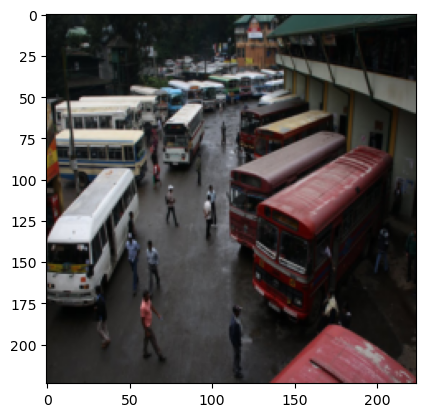

TypeError: conv2d() received an invalid combination of arguments - got (Image, Parameter, NoneType, tuple, tuple, tuple, int), but expected one of:
 * (Tensor input, Tensor weight, Tensor bias, tuple of ints stride, tuple of ints padding, tuple of ints dilation, int groups)
      didn't match because some of the arguments have invalid types: (!Image!, !Parameter!, !NoneType!, !tuple!, !tuple!, !tuple!, int)
 * (Tensor input, Tensor weight, Tensor bias, tuple of ints stride, str padding, tuple of ints dilation, int groups)
      didn't match because some of the arguments have invalid types: (!Image!, !Parameter!, !NoneType!, !tuple!, !tuple!, !tuple!, int)


In [108]:
def get_prediction():
    image = F.to_pil_image(images[0].squeeze(0))
    plt.imshow(image)
    plt.show()
    features = encoder(image).unsqueeze(1)
    output = decoder.sample(features)    
    sentence = clean_sentence(output)
    print(sentence)
    
get_prediction()

In [ ]:
# sample code for a potential accuracy function using the BLEU metric
def get_accuracy(model, data, batch_size, vocab=vocab):
    model.eval()

    dataloader = torch.utils.data.DataLoader(data, batch_size=batch_size, shuffle=True)

    with torch.no_grad():
        ground_truths = []
        predictions = []
        
        for images, captions in dataloader:
            # Generate captions for the images
            captions_pred = model.generate_caption(images)
            
            # Convert the predicted captions and true captions to text
            predicted_caption = []
            actual_caption = []
            for i in range(len(captions_pred)):
                pred_sentence = [vocab.itos[word] for word in captions_pred[i][1:-1]]
                true_sentence = [vocab.itos[word] for word in captions[i][1:-1]]
                
                # Remove any <pad> tokens from the true sentence
                true_sentence = [token for token in true_sentence if token != '<pad>']

                predicted_caption.append(pred_sentence)
                actual_caption.append(true_sentence)
                
            # Add the references and hypotheses to the lists
            ground_truths.append([true_sentence])
            predictions.append(pred_sentence)
                
    # Compute the BLEU scores
    bleu_score = corpus_bleu(ground_truths, predictions)

    return bleu_score

In [ ]:
def train(model, train_data, val_data, batch_size, vocab=vocab, num_epochs=10, learning_rate=0.001):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    
    train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
    val_loader = torch.utils.data.DataLoader(val_data, batch_size=batch_size, shuffle=True)
    
    accuracies = []
    losses = []

    start_time = time.time()
    for epoch in range(num_epochs):
        # Training
        model.train()
        for images, captions in train_dataloader:
            optimizer.zero_grad()
            
            # Forward pass
            outputs = model(images, captions[:-1])
            loss = criterion(outputs.reshape(-1, len(vocab)), captions.reshape(-1))
            
            # Backward pass and optimization
            loss.backward()
            optimizer.step()
        
        # Validation
        accuracy = get_accuracy(model, val_dataloader, vocab, batch_size=batch_size)

        accuracies.append(accuracy)
        losses.append(loss.item())

        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Accuracy (BLEU-4): {accuracy:.4f}')
    
    # At this point, the model has finished training and the training time should be noted down
    print('Finished Training')
    end_time = time.time()
    elapsed_time = end_time - start_time
    print("Total time elapsed: {:.2f} seconds".format(elapsed_time))

    epochs = np.arange(1, num_epochs + 1)
    plt.title("Validation Accuracy Curve (BLEU Score)")
    plt.plot(epochs, accuracies)
    plt.xlabel("Num Epochs")
    plt.ylabel("Validation Accuracy")
    plt.show()

    plt.title("Validation Loss Curve")
    plt.plot(epochs, losses)
    plt.xlabel("Num Epochs")
    plt.ylabel("Validation Loss")
    plt.show()